
#  بيانات الرواتب

## مصدر البيانات

https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data

## تحميل البيانات

In [ ]:
import pandas as pd
import numpy as np

salary_data = pd.read_excel("/content/salary_Data.xlsx")
salary_Data = pd.DataFrame(salary_data)
# طباعة أول خمسة صفوف في مجموعةالبيانات

print("     : أول خمسة صفوف في مجموعة البيانات")
display(salary_Data.head())

print("     ")
# عدد الأعمدة في الصفوف

print( 'عدد الأعمدة في الصفوف :', salary_Data.shape)

print("     ")
# معلومات إضافية عن مجموعة البيانات
print(": معلومات إضافية عن مجموعة البيانات "  )
salary_Data.info()

salary_Data.dtypes


     : أول خمسة صفوف في مجموعة البيانات


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


     
عدد الأعمدة في الصفوف : (6704, 6)
     
: معلومات إضافية عن مجموعة البيانات 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

# تنظيف البيانات و معالجتها

##تطبيق تقنيات تنظيف البيانات

In [ ]:
salary_Data["Gender"].unique()

salary_Data_n = salary_Data[salary_Data.Gender != "Other"]
salary_Data_n.shape
salary_Data_n["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
salary_Data_n=salary_Data_n.replace("Master's Degree","Master's")
salary_Data_n=salary_Data_n.replace("Bachelor's Degree","Bachelor's")
salary_Data_n=salary_Data_n.replace("phD",'PhD')

salary_Data_n['Education Level'].unique()


array(["Bachelor's", "Master's", 'PhD', nan, 'High School'], dtype=object)

In [ ]:
salary_Data_n["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:

salary_Data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [ ]:
salary_Data_n['Salary'] = salary_Data_n['Salary'].fillna(salary_Data_n['Salary'].mean())
salary_Data_n['Age'] = salary_Data_n['Age'].fillna(salary_Data_n['Age'].mean())
salary_Data_n['Years of Experience'] = salary_Data_n['Years of Experience'].fillna(salary_Data_n['Years of Experience'].mean())

In [ ]:
salary_Data_n.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
salary_Data_new = salary_Data_n.dropna()

salary_Data_new.isnull().sum()
salary_Data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6687 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6687 non-null   float64
 1   Gender               6687 non-null   object 
 2   Education Level      6687 non-null   object 
 3   Job Title            6687 non-null   object 
 4   Years of Experience  6687 non-null   float64
 5   Salary               6687 non-null   float64
dtypes: float64(3), object(3)
memory usage: 365.7+ KB


In [ ]:
salary_Data_new = salary_Data_new.drop_duplicates()
salary_Data_new.shape

(1782, 6)

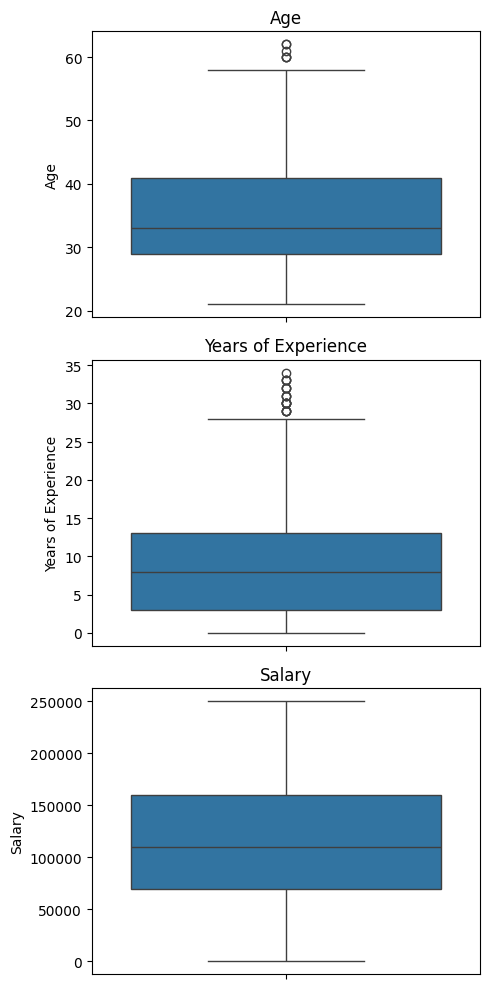

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = salary_Data_new.select_dtypes(include='number').columns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(5, 10))

# Create individual boxplots for each numeric column using seaborn
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=salary_Data_new[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
salary_Data_e = salary_Data_new[salary_Data_new.Age <60]
salary_Data1 = salary_Data_e[salary_Data_e['Years of Experience' ]<29]

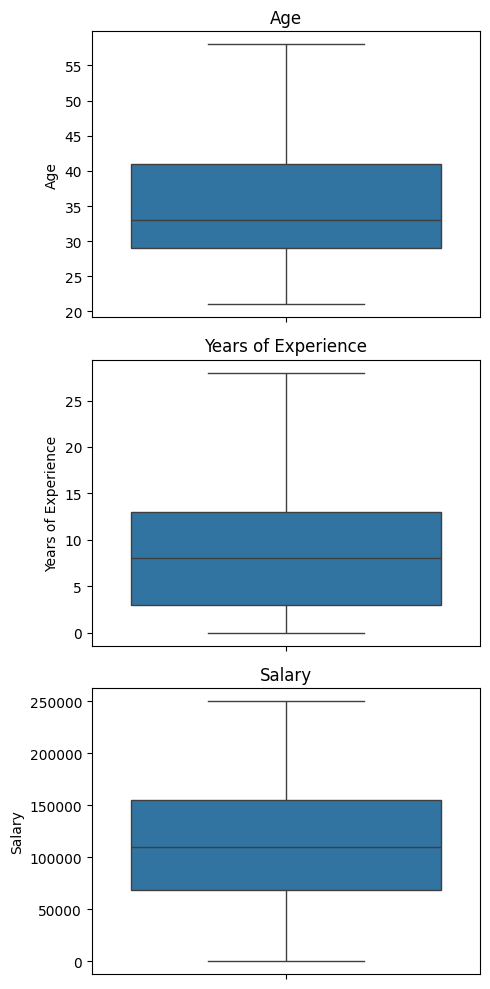

In [ ]:
numeric_columns = salary_Data1.select_dtypes(include='number').columns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(5, 10))

# Create individual boxplots for each numeric column using seaborn
for i, column in enumerate(numeric_columns):
    sns.boxplot(y=salary_Data1[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
salary_Data1.shape
salary_Data1.describe()

,Age,Years of Experience,Salary
count,1759.000000,1759.000000,1759.000000
mean,34.841956,8.868719,112190.057792
std,7.862154,6.428505,51150.373030
min,21.000000,0.000000,350.000000
25%,29.000000,3.000000,68541.500000
50%,33.000000,8.000000,110000.000000
75%,41.000000,13.000000,155000.000000
max,58.000000,28.000000,250000.000000


In [ ]:
salary_Data1.to_excel('amjad_clean_dia.xlsx')

## معالجة البيانات

In [ ]:
salary_Data2=pd.read_excel("/content/amjad_clean_dia.xlsx")

In [ ]:
grouped_Gender = salary_Data1.groupby(['Job Title','Gender']).agg({'Salary': ['min','mean','max']}).reset_index()
grouped_Gender

Job Title  Gender    Salary                         
                                            min           mean       max
0             Account Manager    Male   75000.0   75000.000000   75000.0
1                  Accountant  Female   55000.0   55000.000000   55000.0
2    Administrative Assistant  Female   45000.0   50000.000000   55000.0
3          Back end Developer  Female   51832.0   91893.000000  155795.0
4          Back end Developer    Male   55000.0  103231.471698  178284.0
..                        ...     ...       ...            ...       ...
260             UX Researcher  Female   65000.0   65000.000000   65000.0
261             VP of Finance    Male  200000.0  200000.000000  200000.0
262          VP of Operations    Male  190000.0  190000.000000  190000.0
263             Web Developer  Female   35000.0   56071.428571   85000.0
264             Web Developer    Male   45000.0   71750.000000  110000.0

[265 rows x 5 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

grouped_Job = salary_Data1.groupby('Job Title').agg({'Salary': ['min','mean','max']}).reset_index()
grouped_Job



Job Title    Salary                         
                                    min           mean       max
0             Account Manager   75000.0   75000.000000   75000.0
1                  Accountant   55000.0   55000.000000   55000.0
2    Administrative Assistant   45000.0   50000.000000   55000.0
3          Back end Developer   51832.0   99404.737500  178284.0
4            Business Analyst   75000.0   77500.000000   80000.0
..                        ...       ...            ...       ...
187               UX Designer   80000.0   80000.000000   80000.0
188             UX Researcher   65000.0   65000.000000   65000.0
189             VP of Finance  200000.0  200000.000000  200000.0
190          VP of Operations  190000.0  190000.000000  190000.0
191             Web Developer   35000.0   65294.117647  110000.0

[192 rows x 4 columns]

In [ ]:
grouped_Education_Level	 = salary_Data1.groupby(['Gender','Education Level']).agg({'Salary': ['min','mean','max']}).reset_index()
grouped_Education_Level

Gender Education Level   Salary                         
                               min           mean       max
0  Female      Bachelor's    500.0   84698.776408  215000.0
1  Female     High School  25000.0   38380.078431  154207.0
2  Female        Master's  32000.0  121323.138264  198000.0
3  Female             PhD  55000.0  157035.549550  220000.0
4    Male      Bachelor's    350.0   95495.783338  250000.0
5    Male     High School  25000.0   43796.867925  165919.0
6    Male        Master's  40000.0  133964.574352  228000.0
7    Male             PhD    579.0  160822.070423  250000.0

In [ ]:
grouped_Education_Level1	 = salary_Data1.groupby(['Gender','Education Level']).agg({'Salary': 'mean'}).reset_index()
grouped_Education_Level1

,Gender,Education Level,Salary
0,Female,Bachelor's,84698.776408
1,Female,High School,38380.078431
2,Female,Master's,121323.138264
3,Female,PhD,157035.549550
4,Male,Bachelor's,95495.783338
5,Male,High School,43796.867925
6,Male,Master's,133964.574352
7,Male,PhD,160822.070423


In [ ]:
grouped_Age = salary_Data1.groupby(['Age',"Gender"]).agg({'Salary': ['min','mean','max']}).reset_index()
grouped_Age

Age  Gender    Salary                         
                       min           mean       max
0   21.0  Female   25000.0   25000.000000   25000.0
1   22.0  Female   25000.0   35458.000000   51832.0
2   22.0    Male   25000.0   41666.666667   50000.0
3   23.0  Female   25000.0   43876.857143   62807.0
4   23.0    Male     579.0   52085.200000  119836.0
..   ...     ...       ...            ...       ...
67  56.0  Female  210000.0  210000.000000  210000.0
68  56.0    Male  195000.0  195000.000000  195000.0
69  57.0    Male  195000.0  196666.666667  200000.0
70  58.0  Female  195000.0  195000.000000  195000.0
71  58.0    Male  190004.0  195001.333333  200000.0

[72 rows x 5 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_normalize = ["Salary","Years of Experience","Age"]

min_max_scaler = MinMaxScaler()
salary_Data2[columns_to_normalize] = min_max_scaler.fit_transform(salary_Data2[columns_to_normalize])
salary_Data2.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,0.297297,Male,Bachelor's,Software Engineer,0.178571,0.359103
1,1,0.189189,Female,Master's,Data Analyst,0.107143,0.258963
2,2,0.648649,Male,PhD,Senior Manager,0.535714,0.599439
3,3,0.405405,Female,Bachelor's,Sales Associate,0.250000,0.238935
4,4,0.837838,Male,Master's,Director,0.714286,0.799720


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

salary_Data3 = salary_Data2

salary_Data3['Gender'] = salary_Data2['Gender'].replace({'Female': 0, 'Male': 1})

salary_Data3['Education Level'] = salary_Data2['Education Level'].replace({"High School": 1, "Bachelor's": 2,"Master's":3,"PhD":4})

salary_Data3

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,0.297297,1,2,Software Engineer,0.178571,0.359103
1,1,0.189189,0,3,Data Analyst,0.107143,0.258963
2,2,0.648649,1,4,Senior Manager,0.535714,0.599439
3,3,0.405405,0,2,Sales Associate,0.250000,0.238935
4,4,0.837838,1,3,Director,0.714286,0.799720
...,...,...,...,...,...,...,...
1754,6623,0.594595,0,3,Digital Marketing Manager,0.535714,0.599439
1755,6624,0.162162,1,1,Sales Manager,0.071429,0.158822
1756,6625,0.324324,0,2,Director of Marketing,0.285714,0.319047
1757,6628,0.432432,1,2,Sales Director,0.250000,0.359103


# تصور البيانات

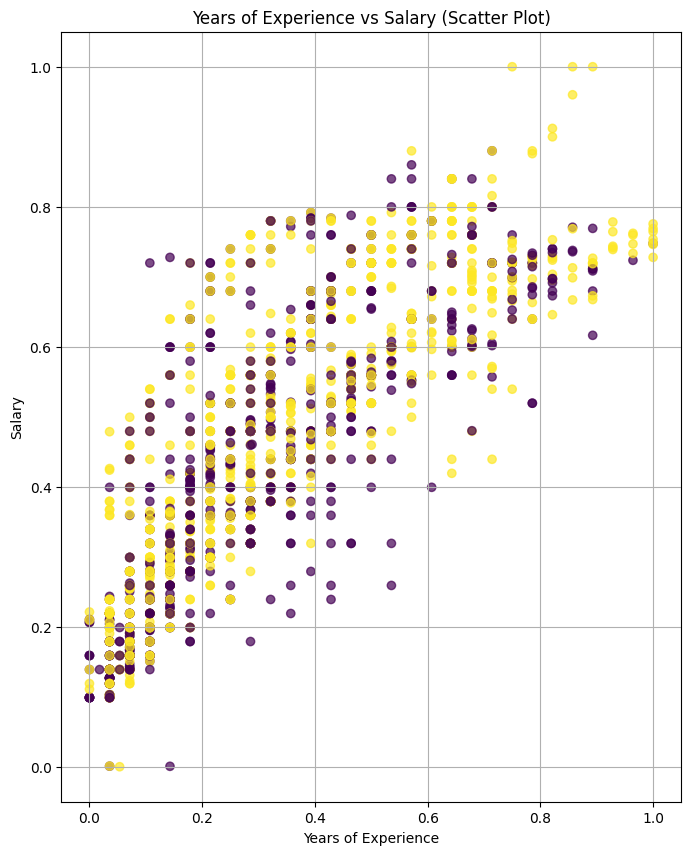

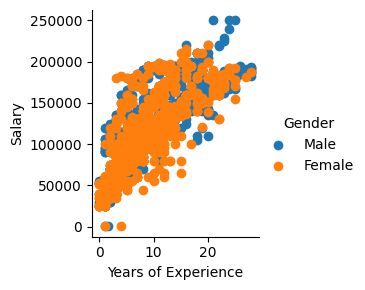

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 10))
plt.scatter(salary_Data2['Years of Experience'] , salary_Data2['Salary'] ,c= salary_Data2['Gender'], alpha=0.7)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary (Scatter Plot)')
plt.grid(True)
plt.show()

g= sns.FacetGrid(salary_Data1, hue="Gender")
g.map(plt.scatter, "Years of Experience", "Salary").add_legend()
plt.show()

<ipython-input-29-f72a40967b6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = salary_Data1.corr()


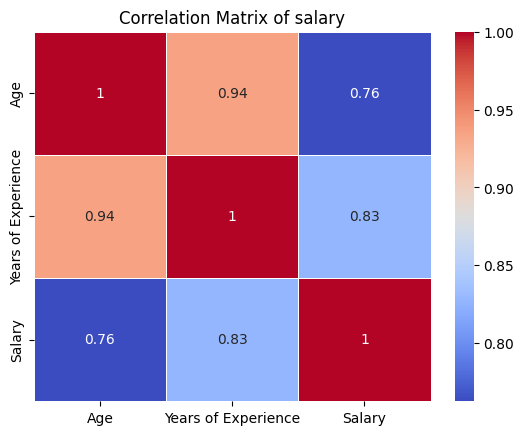

In [ ]:
correlation_matrix = salary_Data1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of salary")
plt.show()

<ipython-input-28-e72e0fa8fe2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = salary_Data2.corr()


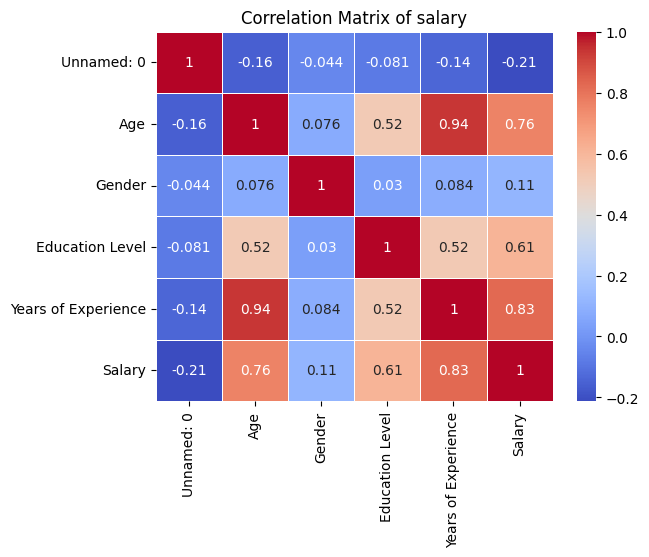

In [ ]:
correlation_matrix = salary_Data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of salary")
plt.show()

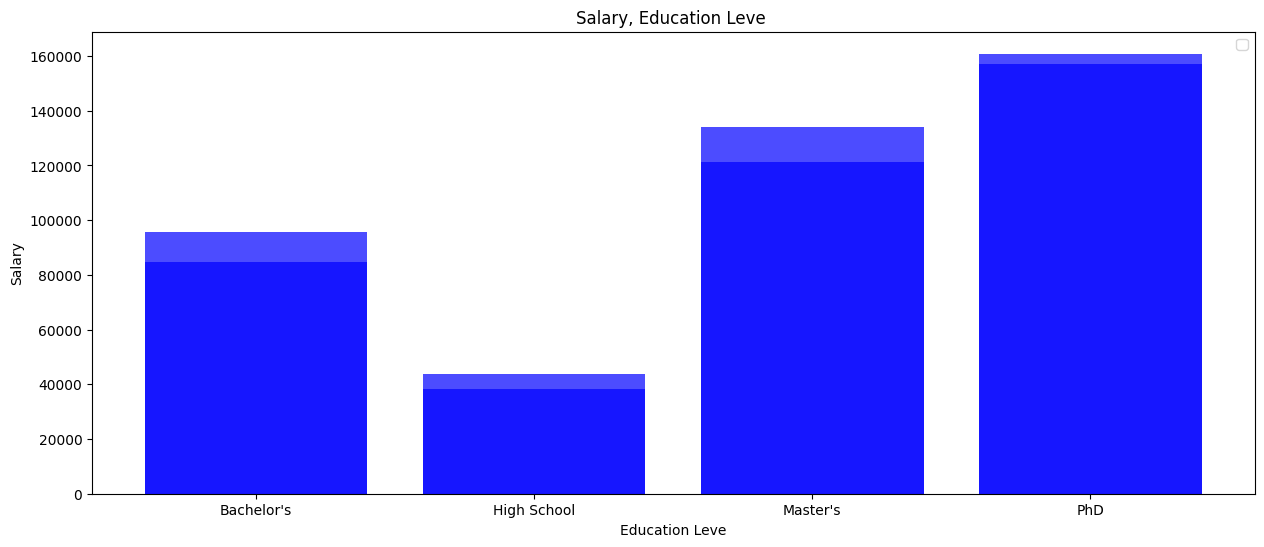

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(grouped_Education_Level1['Education Level'],grouped_Education_Level1['Salary'] ,color='b', alpha=0.7)
plt.xlabel('Education Leve')
plt.ylabel('Salary')
plt.title('Salary, Education Leve ')
plt.legend()
plt.show()